In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
Concrete = pd.read_csv("C:\\Users\\Swathi\\Desktop\\Excelr Classes\\Course_Material\\Python_codes\\Nueral_Network\\concrete.csv")
Concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Concrete.describe()

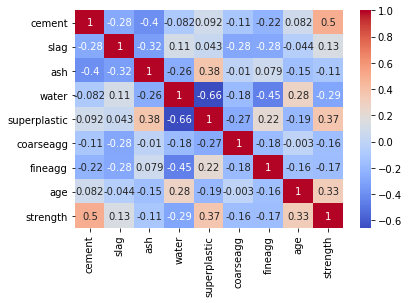

In [17]:
# #Correlation heatmap
corr = Concrete.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')

In [4]:
# boxplots for each independent variables 
# sns.boxplot(Concrete.cement)
# sns.boxplot(Concrete.slag)
# sns.boxplot(Concrete.ash)
# sns.boxplot(Concrete.water)
# sns.boxplot(Concrete.superplastic)

In [5]:
# Scatter plot between all possible independent variables and histogram for each independent variable
# sns.pairplot(Concrete)

In [7]:
colnames = list(Concrete.columns)
colnames
predictors = colnames[:8]
target = colnames[8]

In [8]:
Y = np.asarray(Concrete[target], dtype="|S6")
X = np.asarray(Concrete[predictors])

In [9]:
print(X.shape)
print(Y.shape)

(1030, 8)
(1030,)


In [10]:
print(Y)

[b'79.99' b'61.89' b'40.27' ... b'23.7' b'32.77' b'32.4']


In [11]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10), random_state=1)
clf.fit(X,Y)

pred_values = clf.predict(X)
pred_values

array([b'33.4', b'33.4', b'33.4', ..., b'33.4', b'33.4', b'33.4'],
      dtype='|S8')

In [12]:
#### Predicted scores
clf.score(X,Y)

0.008737864077669903

In [15]:
print(Concrete[predictors].shape)
print(pred_values.shape)

(1030, 8)
(1030,)


In [ ]:
print(); print(metrics.classification_report(expected_y, predicted_y))
    print(); print(metrics.confusion_matrix(expected_y, predicted_y))

In [16]:
# 10 hidden layers suits best for predicting the strength of the concrete
# as the hidden layers increases the accuracy of the model decreases
np.sqrt(np.mean((pred_values-Concrete[predictors])))
pred_values = int(pred_values)

ValueError: Unable to coerce to Series, length must be 8: given 1030